# Import Reddit data
The data contains the top posts from 3 subreddits: Datascience, MachineLearning and artificial. Data is obtained with Python Reddit API Wrapper library.


In [1]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import datetime as dt

# Visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import xformers
# Transformer model
from transformers import pipeline

In [2]:
# Load data
posts_df = pd.read_csv('DS_ML_AI_posts.csv',encoding='UTF-8',engine='python')
comments_df = pd.read_csv('DS_ML_AI_comments1.csv',encoding='UTF-8',engine='python')

# Number of observations - for metric cells
number_of_posts = posts_df.shape[0]
number_of_comments = comments_df.shape[0]
count_subreddits = posts_df['subreddit'].nunique()

In [6]:
# Convert created date to normal datetime
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8056,193,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6047,135,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4823,110,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4761,231,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4713,231,0.96,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,5d2wx5,artificial,1.479222e+09,NaN,https://techcrunch.com/2016/11/15/microsoft-te...,Microsoft collaborates with Elon Musk’s Open A...,NaN,93,18,0.98,2016-11-15 14:58:49,2016
2981,57h7e4,artificial,1.476462e+09,NaN,https://www.technologyreview.com/s/602612/obam...,Obama: My successor will govern a country bein...,NaN,97,19,0.95,2016-10-14 16:22:53,2016
2982,149cdaq,artificial,1.686760e+09,NaN,https://i.redd.it/uftb99bhg06b1.png,Chat GPT is gone wild!,ChatGPT,90,47,0.88,2023-06-14 16:32:33,2023
2983,1356rup,artificial,1.682989e+09,Looking for mainly professional headshots base...,https://www.reddit.com/r/artificial/comments/1...,AI Headshot Generator Recommedations,Question,94,51,0.99,2023-05-02 00:54:26,2023


In [7]:
# Merge posts with their comments
comments_posts_df = posts_df.merge(comments_df, on='post_id', how='left')

# Remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

In [8]:
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8056,193,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6047,135,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4823,110,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4761,231,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4713,231,0.96,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,5d2wx5,artificial,1.479222e+09,NaN,https://techcrunch.com/2016/11/15/microsoft-te...,Microsoft collaborates with Elon Musk’s Open A...,NaN,93,18,0.98,2016-11-15 14:58:49,2016
2981,57h7e4,artificial,1.476462e+09,NaN,https://www.technologyreview.com/s/602612/obam...,Obama: My successor will govern a country bein...,NaN,97,19,0.95,2016-10-14 16:22:53,2016
2982,149cdaq,artificial,1.686760e+09,NaN,https://i.redd.it/uftb99bhg06b1.png,Chat GPT is gone wild!,ChatGPT,90,47,0.88,2023-06-14 16:32:33,2023
2983,1356rup,artificial,1.682989e+09,Looking for mainly professional headshots base...,https://www.reddit.com/r/artificial/comments/1...,AI Headshot Generator Recommedations,Question,94,51,0.99,2023-05-02 00:54:26,2023


#  **EDA**

In [9]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="subreddit", fill="subreddit"), data=posts_df, sampling="none" if posts_df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Posts Created Per Year") 

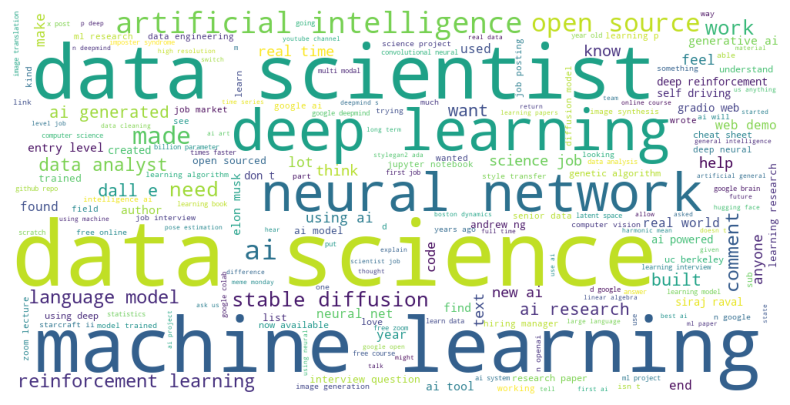

In [10]:
post_title_text = ' '.join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white'
                       ).generate(post_title_text)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [11]:
created_year = 2019

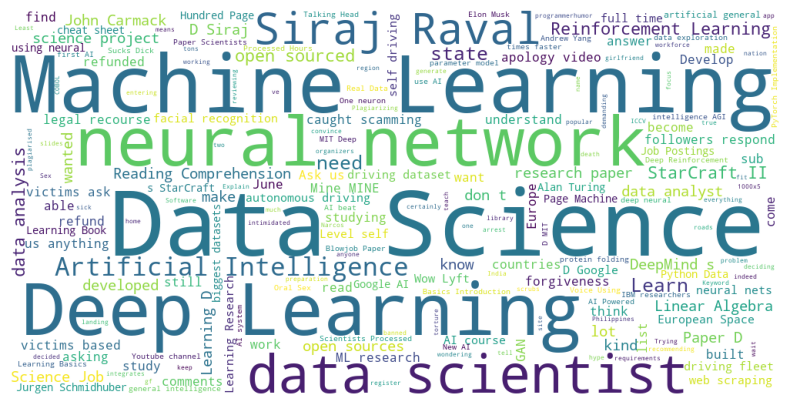

In [12]:
posts_in_year = posts_df[posts_df['created_year'] ==created_year]
post_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white',
                    ).generate(post_title_text_year)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## **🤔 Sentiment analysis**

In [13]:
sentiment_classifier = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")

In [14]:
word_input = "chatgpt"

In [15]:
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:   
        sentiment = 'Not classified'

    return sentiment

In [16]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains(word_input)]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
205746,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"""I use tools to help me do better work"" doesn'..."
205747,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,Ask chatgpt
205748,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"You shouldn’t feel embarrassed, but you *shoul..."
205749,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,As long as you remember that chatGPT can talk ...
205750,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,I use it so much it’s like an unpaid intern. F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240390,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"You.com is built on GPT, so not exactly a comp..."
240391,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,interesitng thanks ill check it out.\n\nwhats ...
240392,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"it would probably be able to do that, its a bi..."
240393,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,For me it has been a game changer. Keep in min...


In [17]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
205746,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"""I use tools to help me do better work"" doesn'...",3 stars
205747,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,Ask chatgpt,1 star
205748,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"You shouldn’t feel embarrassed, but you *shoul...",3 stars
205749,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,As long as you remember that chatGPT can talk ...,5 stars
205750,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,I use it so much it’s like an unpaid intern. F...,5 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240390,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"You.com is built on GPT, so not exactly a comp...",3 stars
240391,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,interesitng thanks ill check it out.\n\nwhats ...,2 stars
240392,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"it would probably be able to do that, its a bi...",3 stars
240393,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,For me it has been a game changer. Keep in min...,5 stars


In [18]:
from lets_plot import *
from lets_plot.mapping import *

ggplot(comments_posts_df_sub) + geom_pie(aes(fill=as_discrete('sentiment', order_by='..count..')), 
                                            size=30, hole=0.2, stroke=1.0, 
                                            labels=layer_labels()
                                                    .line('@sentiment')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(), 
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Sentiment of around the topic')

# 🤯 Emotion recognition

In [19]:


emotion_classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key=lambda x: x['score'])['label']

    return emotion

In [20]:
# RuntimeError: The size of tensor a (590) must match the size of tensor b (512) at non-singleton dimension 1 help me withh tah 
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x[:512]))
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,emotion
205746,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"""I use tools to help me do better work"" doesn'...",3 stars,sadness
205747,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,Ask chatgpt,1 star,anger
205748,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,"You shouldn’t feel embarrassed, but you *shoul...",3 stars,sadness
205749,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,As long as you remember that chatGPT can talk ...,5 stars,joy
205750,16orquj,datascience,1.695331e+09,"I use chatgpt at work a lot, not just for codi...",https://www.reddit.com/r/datascience/comments/...,Should I feel bad by using chatgpt?,Discussion,289,115,0.88,2023-09-21 21:20:59,2023,I use it so much it’s like an unpaid intern. F...,5 stars,joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240390,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"You.com is built on GPT, so not exactly a comp...",3 stars,anger
240391,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,interesitng thanks ill check it out.\n\nwhats ...,2 stars,anger
240392,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,"it would probably be able to do that, its a bi...",3 stars,anger
240393,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,17,0.94,2023-01-06 07:25:29,2023,For me it has been a game changer. Keep in min...,5 stars,joy


In [21]:
from lets_plot import *
ggplot(comments_posts_df_sub) + geom_bar(aes(x="emotion", y="..count.."))